# Roofline Plot for ETHZ Studen Lab Computer  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import labellines

__Processor__: 3.4GHz i7-6700 quad core CPU   
__Architecture__: Alder Lake (Skylake family)  
__Memory__: 16GB RAM @ __34.1 GB/s__ (max bandwidth)  

Consider a processor with the following hardware parameters (assume 1GB = 109B):  

 - SIMD vector length of 256 bits (AVX2).  

 - Port 0 (P0): `AVX2`, `FMA`, `ADD`, `MUL`, `DIV`, `SQRT` & INT_OPS  
 - Port 1 (P1): `AVX2`, `FMA`, `ADD`, `MUL`
 - Port 5 (P2): `AVX2`, `PERMUTE`, `ADD`     
 
 - Read bandwidth from the main memory is __34.1 GB/s__.  
 - Processor frequency is __3.4 GHz__.  

In [2]:
beta_DRAM = 25.91
beta_L3 = 67.8
beta_L2 = 125.1
beta_L1 = 386.55
pi = 36.98
pi_scalar = 9.17
mem_comp_DRAM = pi/beta_DRAM
mem_comp_L3 = pi/beta_L3
mem_comp_L2 = pi/beta_L2
mem_comp_L1 = pi/beta_L1

I_n = [0.0, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
roofline_DRAM = [x*beta_DRAM for x in I_n]
roofline_L3 = [x*beta_L3 for x in I_n]
roofline_L2 = [x*beta_L2 for x in I_n]
roofline_L1 = [x*beta_L1 for x in I_n]
#peak_perf = [pi for i in range(len(I_n)) if pi <= I_n[i]]

tile_vectorized_min_plus_y = [0.066, 0.93, 1.1, 1.23, 1.29, 1.21, 1.21, 1.26, 1.24, 0.92, 0.87]
tile_vectorized_min_plus_x = [0.083 for _ in tile_vectorized_min_plus_y]
tile_vectorized_min_plus_ns = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

1623.51
[0.0, 3.23875, 6.4775, 12.955, 25.91, 51.82, 103.64]


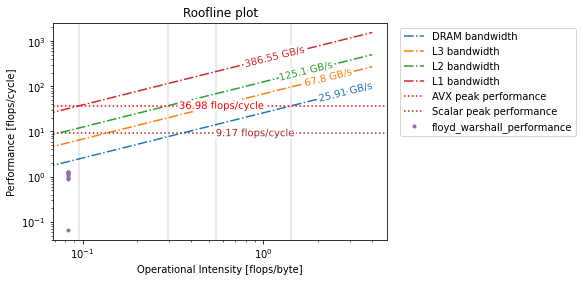

In [6]:
# Plot roofline
fig, ax = plt.subplots(1, 1)
ax.plot(I_n, roofline_DRAM, '-.', label = "25.91 GB/s")
ax.plot(I_n, roofline_L3, '-.', label = "67.8 GB/s")
ax.plot(I_n, roofline_L2, '-.', label = "125.1 GB/s")
ax.plot(I_n, roofline_L1, '-.', label = "386.55 GB/s")

ax.axhline(y = pi, color = 'r', linestyle = ':', label = "36.98 flops/cycle")
ax.axhline(y = pi_scalar, color = 'brown', linestyle = ':', label = "9.17 flops/cycle")
ax.plot(tile_vectorized_min_plus_x, tile_vectorized_min_plus_y, ".")
# Plot performances
#compI = 1.0/3.0
#comp1y, comp2y = (3.2, 4)
#plt.plot(compI, comp1y, marker="o", markersize=5, markerfacecolor="red", label="comp1")
#plt.plot(compI, comp2y, marker="o", markersize=5, markerfacecolor="blue", label="comp2")

#compI2 = 8.0/15.0
#plt.plot(compI2, comp1y, marker="o", markersize=5, markerfacecolor="green", label="comp1")
#plt.plot(compI2, comp2y, marker="o", markersize=5, markerfacecolor="orange", label="comp2")
_, ymax = ax.get_ybound()
print(ymax)
print(roofline_DRAM)
ax.axvline(x = mem_comp_DRAM,  color = 'black', alpha = 0.1, linestyle = '-') #ymax = np.log(pi) / np.log(ymax),
ax.axvline(x = mem_comp_L3, color = 'black', alpha = 0.1, linestyle = '-')
ax.axvline(x = mem_comp_L2,  color = 'black', alpha = 0.1, linestyle = '-')
ax.axvline(x = mem_comp_L1,  color = 'black', alpha = 0.1, linestyle = '-')

labellines.labelLines(plt.gca().get_lines(),zorder=2.5)

# Title axis and graph
plt.title('Roofline plot')
plt.xlabel('Operational Intensity [flops/byte]')
plt.ylabel('Performance [flops/cycle]')

# Make plot log-log
plt.xscale('log')
plt.yscale('log')

# Plot legend
mylabels = ["DRAM bandwidth", "L3 bandwidth","L2 bandwidth", "L1 bandwidth", "AVX peak performance", "Scalar peak performance", "floyd_warshall_performance"]
plt.legend(bbox_to_anchor = (1.3, 1), loc = 'upper center', labels = mylabels)

plt.show()